In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style("whitegrid")
# %config InlineBackend.figure_formats = ['svg']
tab20b = plt.colormaps.get('tab20b')

In [2]:
def dat2arr(dat, Nx, Ny, dx, dy):
    runtime_arr = np.zeros([Nx, Ny])
    cputime_arr = np.zeros([Nx, Ny])
    count = np.zeros([Nx, Ny])
    for d in dat:
        i = int(d[0]/dx) - 1
        j = int(d[1]/dy) - 1
        runtime_arr[i, j] += d[2]
        cputime_arr[i, j] += d[3]
        count[i, j] += 1
    runtime_arr /= count
    cputime_arr /= count
    return runtime_arr, cputime_arr

In [3]:
## load data
runtime_mpi   = np.loadtxt("../data/runtime_mpi.txt")
runtime_pth   = np.loadtxt("../data/runtime_pth.txt")
runtime_pds = np.loadtxt("../data/runtime_pth_ds.txt")
runtime_seq   = np.loadtxt("../data/runtime_detailed_mpi_1.txt")
## define parameters
xstep = 500
ystep = 1
xmin  = int(min(runtime_mpi[:, 0]) / xstep)
xmax  = int(max(runtime_mpi[:, 0]) / xstep)
ymin  = int(min(runtime_mpi[:, 1]) / ystep)
ymax  = int(max(runtime_mpi[:, 1]) / ystep)
Nx    = xmax - xmin + 1
Ny    = ymax - ymin + 1
xticks = (xmin + np.array(list(range(Nx)))) * xstep
yticks = (ymin + np.array(list(range(Ny)))) * ystep
xticks = np.int64(xticks)
yticks = np.int64(yticks)
## convert data to arrays
runtime_arr_seq, cputime_arr_seq = dat2arr(runtime_seq, Nx, 1, xstep, 1)
runtime_arr_mpi, cputime_arr_mpi = dat2arr(runtime_mpi, Nx, Ny, xstep, ystep)
runtime_arr_pth, cputime_arr_pth = dat2arr(runtime_pth, Nx, Ny, xstep, ystep)
runtime_arr_pds, cputime_arr_pds = dat2arr(runtime_pds, Nx, Ny, xstep, ystep)
## calculate rate and efficiency
#  mpi
rate_arr_mpi   = runtime_arr_seq / runtime_arr_mpi
eff_arr_mpi    = runtime_arr_seq / (runtime_arr_mpi * yticks.reshape([1, -1]))
cpueff_arr_mpi =  cputime_arr_seq / cputime_arr_mpi
#  pthreads
rate_arr_pth   = runtime_arr_seq / runtime_arr_pth
eff_arr_pth    = runtime_arr_seq / (runtime_arr_pth * yticks.reshape([1, -1]))
cpueff_arr_pth =  cputime_arr_seq / cputime_arr_pth
#  pthreads ds
rate_arr_pds   = runtime_arr_seq / runtime_arr_pds
eff_arr_pds    = runtime_arr_seq / (runtime_arr_pds * yticks.reshape([1, -1]))
cpueff_arr_pds =  cputime_arr_seq / cputime_arr_pds
## create dataframes
#  mpi
rate_df_mpi   = pd.DataFrame(rate_arr_mpi, columns=yticks, index=xticks)
eff_df_mpi    = pd.DataFrame(np.log10(eff_arr_mpi), columns=yticks, index=xticks)
cpueff_df_mpi = pd.DataFrame(np.log10(cpueff_arr_mpi), columns=yticks, index=xticks)
#  pthreads
rate_df_pth   = pd.DataFrame(rate_arr_pth, columns=yticks, index=xticks)
eff_df_pth    = pd.DataFrame(np.log10(eff_arr_pth), columns=yticks, index=xticks)
cpueff_df_pth = pd.DataFrame(np.log10(cpueff_arr_pth), columns=yticks, index=xticks)
#  pthreads ds
rate_df_pds   = pd.DataFrame(rate_arr_pds, columns=yticks, index=xticks)
eff_df_pds    = pd.DataFrame(np.log10(eff_arr_pds), columns=yticks, index=xticks)
cpueff_df_pds = pd.DataFrame(np.log10(cpueff_arr_pds), columns=yticks, index=xticks)

## mpi vs pthreads
ratio_arr_mpi2pth = runtime_arr_pth / runtime_arr_mpi
ratio_df_mpi2pth  = pd.DataFrame(ratio_arr_mpi2pth, columns=yticks, index=xticks)

## pds vs pth
ratio_arr_pds2pth = runtime_arr_pth / runtime_arr_pds
ratio_df_pds2pth  = pd.DataFrame(ratio_arr_pds2pth, columns=yticks, index=xticks)

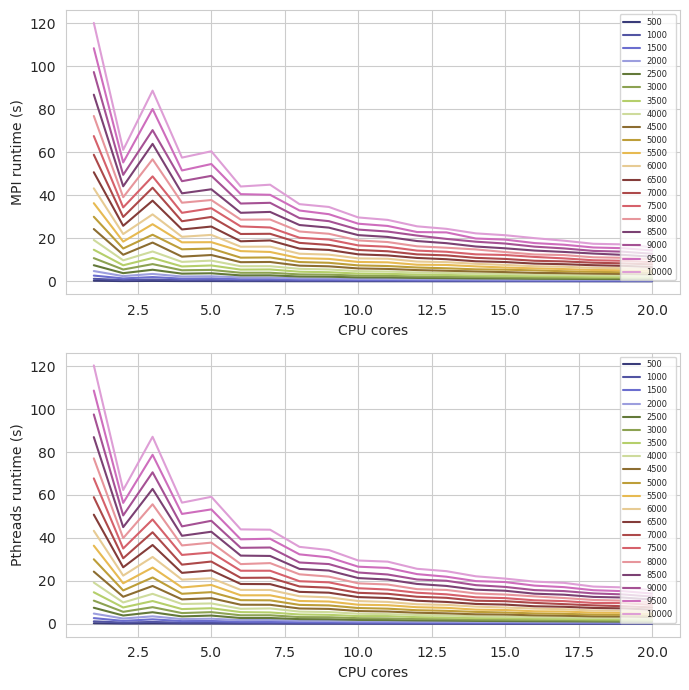

In [4]:
# runtime vs core plot
start = 0
end = 20
fig, axes = plt.subplots(2, 1, figsize=[7, 7])
# axes[0].plot(xticks, runtime_arr_seq, label=str(1))
for i in range(start, end):
    axes[0].plot(list(yticks), runtime_arr_mpi[i, :], label=str(xticks[i]), color=tab20b.colors[i])
    axes[1].plot(list(yticks), runtime_arr_pth[i, :], label=str(xticks[i]), color=tab20b.colors[i])
axes[0].legend(prop={'size': 6})
axes[0].set_xlabel("CPU cores")
axes[0].set_ylabel("MPI runtime (s)")
axes[1].legend(prop={'size': 6})
axes[1].set_xlabel("CPU cores")
axes[1].set_ylabel("Pthreads runtime (s)")
plt.tight_layout()
plt.savefig("runtime-core.pdf")

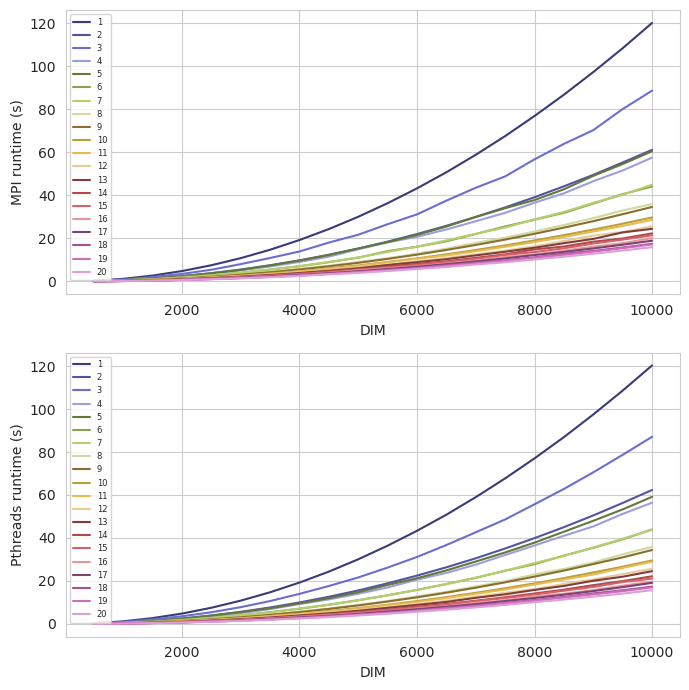

In [5]:
# runtime vs size plot
start = 0
end = 20
fig, axes = plt.subplots(2, 1, figsize=[7, 7])
# axes[0].plot(xticks, runtime_arr_seq, label=str(1))
for i in range(start, end):
    axes[0].plot(xticks, runtime_arr_mpi[:, i], label=str(yticks[i]), color=tab20b.colors[i])
    axes[1].plot(xticks, runtime_arr_pth[:, i], label=str(yticks[i]), color=tab20b.colors[i])
axes[0].legend(prop={'size': 6})
axes[0].set_xlabel("DIM")
axes[0].set_ylabel("MPI runtime (s)")
axes[1].legend(prop={'size': 6})
axes[1].set_xlabel("DIM")
axes[1].set_ylabel("Pthreads runtime (s)")
plt.tight_layout()
plt.savefig("runtime-dim.pdf")

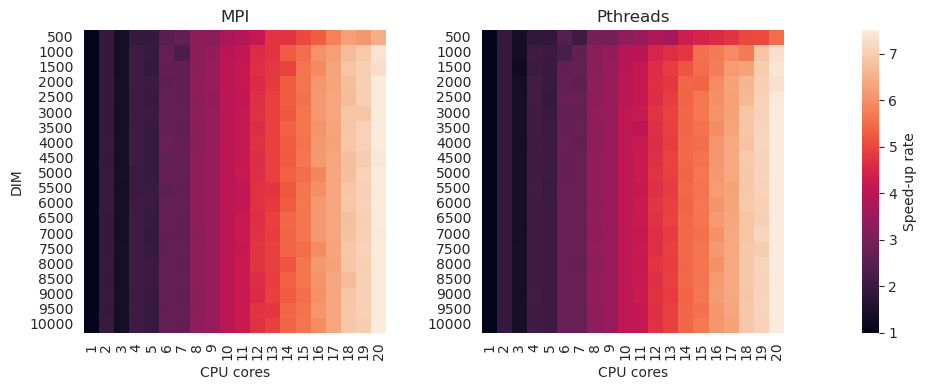

In [6]:
# rate heatmap
fig, axes = plt.subplots(1, 3, figsize=(9.5, 4), gridspec_kw={'width_ratios':[1,1,0.05]})
axes[0] = sns.heatmap(rate_df_mpi, vmin=1, vmax=7.5, cbar_kws={'label': 'Speed-up rate'}, cbar=False, square=True, ax=axes[0])
axes[0].set_xlabel("CPU cores")
axes[0].set_ylabel("DIM")
axes[1] = sns.heatmap(rate_df_pth, vmin=1, vmax=7.5, cbar_kws={'label': 'Speed-up rate'}, square=True, ax=axes[1], cbar_ax=axes[2])
axes[1].set_xlabel("CPU cores")
# axes[1].set_ylabel("Array size")

axes[0].set_title("MPI")
axes[1].set_title("Pthreads")
plt.tight_layout()
plt.savefig("heatmap-rate.pdf")

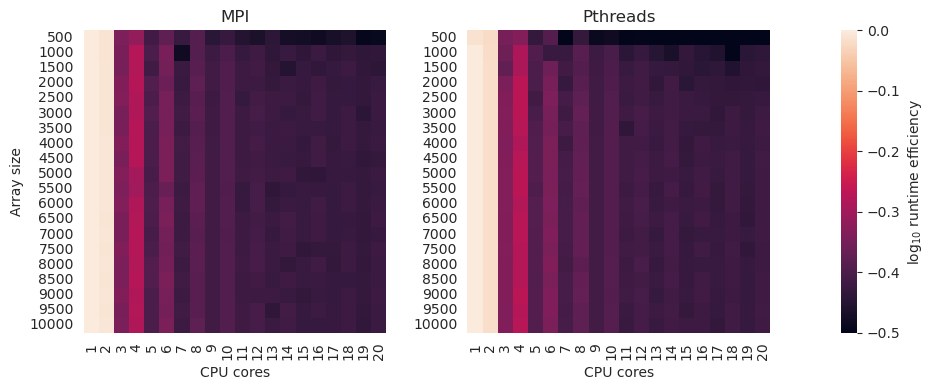

In [7]:
# runtime efficiency heatmap
fig, axes = plt.subplots(1, 3, figsize=(9.5, 4), gridspec_kw={'width_ratios':[1,1,0.05]})
axes[0] = sns.heatmap(eff_df_mpi, vmax=0, vmin=-0.5, cbar_kws={'label': 'runtime efficiency'}, cbar=False, square=True, ax=axes[0])
axes[0].set_xlabel("CPU cores")
axes[0].set_ylabel("Array size")
axes[1] = sns.heatmap(eff_df_pth, vmax=0, vmin=-0.5, cbar_kws={'label': r'$\log_{10}$ runtime efficiency'}, square=True, ax=axes[1], cbar_ax=axes[2])
axes[1].set_xlabel("CPU cores")

axes[0].set_title("MPI")
axes[1].set_title("Pthreads")
plt.tight_layout()
plt.savefig("heatmap-eff.pdf")

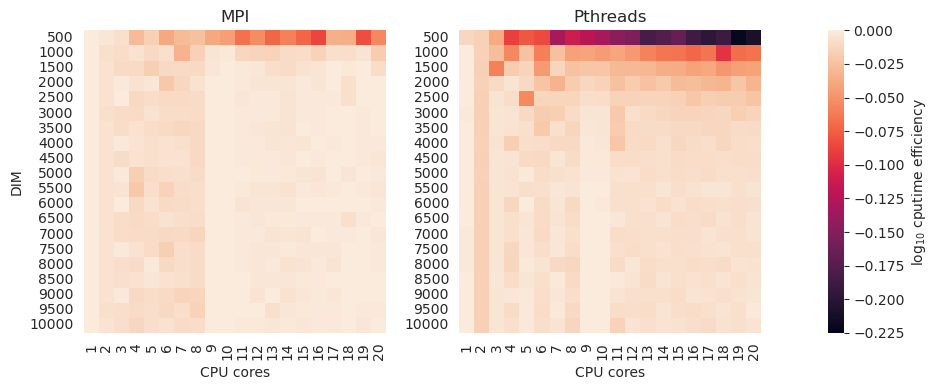

In [8]:
# calculation efficiency heatmap
fig, axes = plt.subplots(1, 3, figsize=(9.5, 4), gridspec_kw={'width_ratios':[1,1,0.05]})
axes[0] = sns.heatmap(cpueff_df_mpi, vmax=0, vmin=-0.225, cbar_kws={'label': 'Runtime efficiency'}, cbar=False, square=True, ax=axes[0])
axes[0].set_xlabel("CPU cores")
axes[0].set_ylabel("DIM")
axes[1] = sns.heatmap(cpueff_df_pth, vmax=0, vmin=-0.225, cbar_kws={'label': r'$\log_{10}$ cputime efficiency'}, square=True, ax=axes[1], cbar_ax=axes[2])
axes[1].set_xlabel("CPU cores")

axes[0].set_title("MPI")
axes[1].set_title("Pthreads")
plt.tight_layout()
plt.savefig("heatmap-cpueff.pdf")

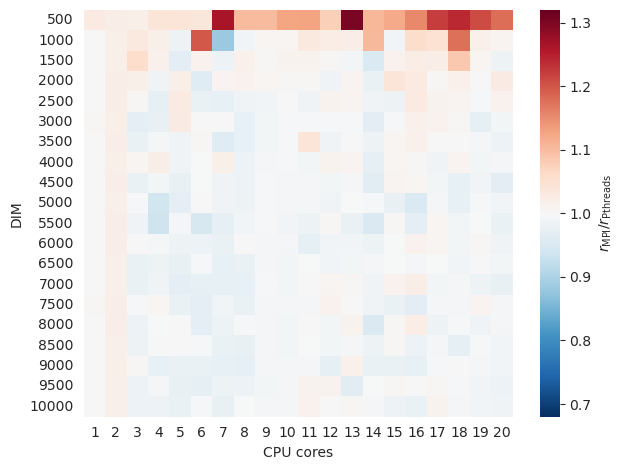

In [9]:
# compare mpi and pthreads
ax = sns.heatmap(ratio_df_mpi2pth, cmap="RdBu_r", center=1, vmax=1.32, vmin=1-0.32,
                 cbar_kws={'label': r"$r_{\mathrm{MPI}} / r_{\mathrm{Pthreads}}$"})
ax.set_xlabel("CPU cores")
ax.set_ylabel("DIM")
plt.tight_layout()
plt.savefig("mpi2pth.pdf")

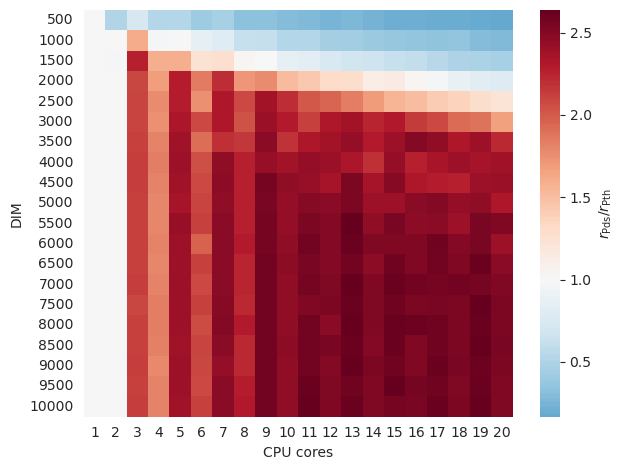

In [10]:
# compare pds and pth
ax = sns.heatmap(ratio_df_pds2pth, cmap="RdBu_r", center=1,
                 cbar_kws={'label': r"$r_{\mathrm{Pds}} / r_{\mathrm{Pth}}$"})
ax.set_xlabel("CPU cores")
ax.set_ylabel("DIM")
plt.tight_layout()
plt.savefig("pds2pth.pdf")